In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')

In [156]:
df.columns

Index(['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year',
       'fuel_efficiency_mpg'],
      dtype='object')

In [ ]:
df.dtypes

engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
fuel_efficiency_mpg    float64
dtype: object

In [ ]:
#Preparing the dataset
# Keep only the specified columns
df = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]

In [6]:
# Display the result
print(df.head())

   engine_displacement  horsepower  vehicle_weight  model_year  \
0                  170       159.0     3413.433759        2003   
1                  130        97.0     3149.664934        2007   
2                  170        78.0     3079.038997        2018   
3                  220         NaN     2542.392402        2009   
4                  210       140.0     3460.870990        2009   

   fuel_efficiency_mpg  
0            13.231729  
1            13.688217  
2            14.246341  
3            16.912736  
4            12.488369  


<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

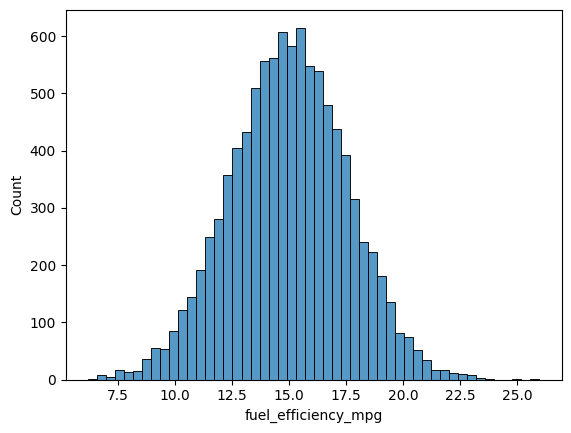

In [ ]:
#EDA
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.histplot(df.fuel_efficiency_mpg, bins=50)

Question 1

In [ ]:
#Missing values

df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

Question 2

In [9]:
# Compute median

median_hp = df['horsepower'].median()
print("Median horsepower:", median_hp)

Median horsepower: 149.0


In [10]:
#Prepare and split the dataset

n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [11]:
n

9704

In [12]:
n_val, n_test, n_train

(1940, 1940, 5824)

In [13]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [14]:
idx = np.arange(n)

In [15]:
np.random.seed(42)
np.random.shuffle(idx)

In [ ]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [17]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209


In [ ]:

len(df_train), len(df_val), len(df_test)

(5824, 1940, 1940)

In [ ]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [ ]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,220,144.0,2535.887591,2009,16.642943
1,160,141.0,2741.170484,2019,16.298377
2,230,155.0,2471.880237,2017,18.591822
3,150,206.0,3748.164469,2015,11.818843
4,300,111.0,2135.716359,2006,19.402209


In [ ]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

In [ ]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [ ]:
y_train

array([16.64294342, 16.29837715, 18.59182197, ..., 17.59323665,
       18.92574819, 17.96528447])

In [ ]:

len(y_train)

5824

Qusetion3

In [34]:
base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

In [35]:
df_train[base]

,engine_displacement,horsepower,vehicle_weight,model_year
0,220,144.0,2535.887591,2009
1,160,141.0,2741.170484,2019
2,230,155.0,2471.880237,2017
3,150,206.0,3748.164469,2015
4,300,111.0,2135.716359,2006
...,...,...,...,...
5819,260,139.0,2606.972984,2009
5820,280,132.0,4004.214323,2014
5821,210,152.0,2500.175687,2020
5822,250,154.0,2254.313245,2002


#Fill missing values with 0

In [41]:
df_train[base].isnull().sum()

engine_displacement      0
horsepower             429
vehicle_weight           0
model_year               0
dtype: int64

In [93]:
df_fill_zero_train = df_train[base].copy()
df_fill_zero_train


,engine_displacement,horsepower,vehicle_weight,model_year
0,220,144.0,2535.887591,2009
1,160,141.0,2741.170484,2019
2,230,155.0,2471.880237,2017
3,150,206.0,3748.164469,2015
4,300,111.0,2135.716359,2006
...,...,...,...,...
5819,260,139.0,2606.972984,2009
5820,280,132.0,4004.214323,2014
5821,210,152.0,2500.175687,2020
5822,250,154.0,2254.313245,2002


In [94]:
df_fill_zero_val = df_val[base].copy()
df_fill_zero_val

,engine_displacement,horsepower,vehicle_weight,model_year
0,180,112.0,2772.134410,2020
1,260,138.0,3014.061530,2022
2,140,181.0,3652.186151,2016
3,270,105.0,2753.040847,2023
4,170,224.0,4163.375137,2003
...,...,...,...,...
1935,290,205.0,3403.401496,2019
1936,200,159.0,2752.516039,2009
1937,230,202.0,3303.000688,2008
1938,220,169.0,3293.420251,2008


In [95]:
df_fill_zero_train.isnull().sum()


engine_displacement      0
horsepower             429
vehicle_weight           0
model_year               0
dtype: int64

In [96]:
df_fill_zero_val.isnull().sum()


engine_displacement      0
horsepower             136
vehicle_weight           0
model_year               0
dtype: int64

In [97]:
df_fill_zero_train['horsepower'] = df_fill_zero_train['horsepower'].fillna(0)

In [98]:
df_fill_zero_val['horsepower'] = df_fill_zero_val['horsepower'].fillna(0)

In [99]:
df_fill_zero_train.isnull().sum()


engine_displacement    0
horsepower             0
vehicle_weight         0
model_year             0
dtype: int64

In [100]:
df_fill_zero_val.isnull().sum()


engine_displacement    0
horsepower             0
vehicle_weight         0
model_year             0
dtype: int64

In [101]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [108]:
X_train = df_fill_zero_train.values
X_val = df_fill_zero_val.values
w0, w = train_linear_regression(X_train, y_train)
y_pred_zero = w0 + X_val.dot(w)

In [110]:
train_linear_regression(X_train, y_train)

y_pred_zero = w0 + X_val.dot(w)

y_pred_zero

array([16.0373382 , 14.92522236, 11.86445895, ..., 13.69560868,
       13.62575126, 16.44936805])

<Axes: ylabel='Count'>

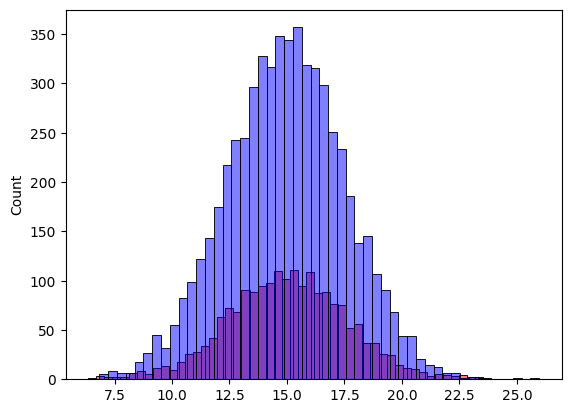

In [111]:
sns.histplot(y_pred_zero, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [126]:
def rmse(y_val, y_pred_zero):
    se = (y_val - y_pred_zero) ** 2
    mse = se.mean()
    return np.sqrt(mse)
    
rmse(y_val, y_pred_zero)

0.5173782638844466

In [129]:
# Compute and round to 2 decimal places
score = rmse(y_val, y_pred_zero)
print(round(score, 2))

0.52


#Fill missing values with mean

In [114]:
df_fill_mean_train = df_train[base].copy()
df_fill_mean_train

,engine_displacement,horsepower,vehicle_weight,model_year
0,220,144.0,2535.887591,2009
1,160,141.0,2741.170484,2019
2,230,155.0,2471.880237,2017
3,150,206.0,3748.164469,2015
4,300,111.0,2135.716359,2006
...,...,...,...,...
5819,260,139.0,2606.972984,2009
5820,280,132.0,4004.214323,2014
5821,210,152.0,2500.175687,2020
5822,250,154.0,2254.313245,2002


In [115]:
df_fill_mean_val = df_val[base].copy()
df_fill_mean_val

,engine_displacement,horsepower,vehicle_weight,model_year
0,180,112.0,2772.134410,2020
1,260,138.0,3014.061530,2022
2,140,181.0,3652.186151,2016
3,270,105.0,2753.040847,2023
4,170,224.0,4163.375137,2003
...,...,...,...,...
1935,290,205.0,3403.401496,2019
1936,200,159.0,2752.516039,2009
1937,230,202.0,3303.000688,2008
1938,220,169.0,3293.420251,2008


In [116]:
df_fill_mean_train.isnull().sum()


engine_displacement      0
horsepower             429
vehicle_weight           0
model_year               0
dtype: int64

In [117]:
df_fill_mean_val.isnull().sum()


engine_displacement      0
horsepower             136
vehicle_weight           0
model_year               0
dtype: int64

In [118]:
df_fill_mean_train['horsepower'].fillna(df_fill_mean_train['horsepower'].mean(), inplace=True)


/tmp/ipykernel_125894/2285005047.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fill_mean_train['horsepower'].fillna(df_fill_mean_train['horsepower'].mean(), inplace=True)


In [119]:
df_fill_mean_val['horsepower'].fillna(df_fill_mean_val['horsepower'].mean(), inplace=True)


/tmp/ipykernel_125894/2970514039.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fill_mean_val['horsepower'].fillna(df_fill_mean_val['horsepower'].mean(), inplace=True)


In [120]:
df_fill_mean_train.isnull().sum()


engine_displacement    0
horsepower             0
vehicle_weight         0
model_year             0
dtype: int64

In [121]:
df_fill_mean_val.isnull().sum()


engine_displacement    0
horsepower             0
vehicle_weight         0
model_year             0
dtype: int64

In [76]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [122]:
X_train = df_fill_mean_train.values
X_val = df_fill_mean_val.values
w0, w = train_linear_regression(X_train, y_train)
y_pred_mean = w0 + X_val.dot(w)

In [123]:
train_linear_regression(X_train, y_train)

y_pred_mean = w0 + X_val.dot(w)

y_pred_mean

array([15.73837498, 14.80338305, 12.03624928, ..., 14.01482574,
       13.72161355, 16.1936294 ])

<Axes: ylabel='Count'>

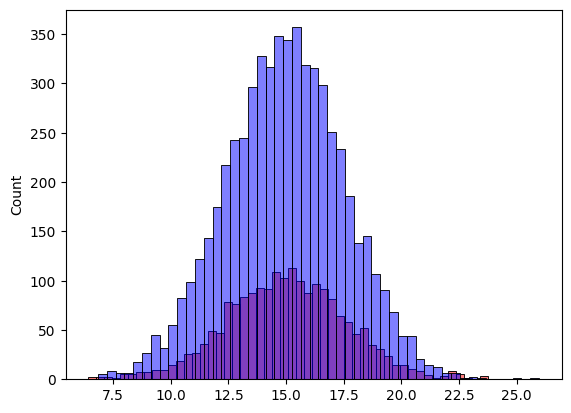

In [124]:
sns.histplot(y_pred_mean, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [ ]:
def rmse(y_val, y_pred_mean):
    se = (y_val - y_pred_mean) ** 2
    mse = se.mean()
    return np.sqrt(mse)
    
rmse(y_val, y_pred_mean)

0.4636236995020941

In [128]:
# Compute and round to 2 decimal places
score = rmse(y_val, y_pred_mean)
print(round(score, 2))

0.46


we see RMSE in df_fill_mean is better than df_fill_zero

Qusetion4

In [130]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [139]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train_zero = df_fill_zero_train.values
    X_val_zero = df_fill_zero_val.values
    w0, w = train_linear_regression_reg(X_train_zero, y_train, r=r)

    y_pred_zero = w0 + X_val_zero.dot(w)
    score = rmse(y_val, y_pred_zero)
    
    print(r, w0, round(score, 2))


0 28.82736547365895 0.52
0.01 24.92683841981215 0.52
0.1 11.239661084581073 0.52
1 1.7315979411219746 0.52
5 0.3638075020482907 0.52
10 0.18306246621686947 0.52
100 0.01841801730688404 0.52


In [140]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train_zero = df_fill_zero_train.values
    X_val_zero = df_fill_zero_val.values
    w0, w = train_linear_regression_reg(X_train_zero, y_train, r=r)

    y_pred_zero = w0 + X_val_zero.dot(w)
    score = rmse(y_val, y_pred_zero)
    
    print(r, w0, round(score, 4))

0 28.82736547365895 0.5174
0.01 24.92683841981215 0.5171
0.1 11.239661084581073 0.5188
1 1.7315979411219746 0.5222
5 0.3638075020482907 0.5229
10 0.18306246621686947 0.523
100 0.01841801730688404 0.5231


we see the smallet RMSE score with round 2 doesnt exist and with round 4 the smallest RMSE is for r=0.01

Qusetion5

In [141]:
base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

In [142]:
df_train[base]

,engine_displacement,horsepower,vehicle_weight,model_year
0,220,144.0,2535.887591,2009
1,160,141.0,2741.170484,2019
2,230,155.0,2471.880237,2017
3,150,206.0,3748.164469,2015
4,300,111.0,2135.716359,2006
...,...,...,...,...
5819,260,139.0,2606.972984,2009
5820,280,132.0,4004.214323,2014
5821,210,152.0,2500.175687,2020
5822,250,154.0,2254.313245,2002


In [143]:
# Total number of samples
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [144]:
# -----------------------------
# Linear regression function
# -----------------------------
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [145]:
# -----------------------------
# RMSE function
# -----------------------------
def rmse(y_val, y_pred_zero):
    se = (y_val - y_pred_zero) ** 2
    mse = se.mean()
    return np.sqrt(mse)
    
rmse(y_val, y_pred_zero)

0.5230636233819933

In [147]:
# -----------------------------
# Test different seeds
# -----------------------------
seeds = [0,1,2,3,4,5,6,7,8,9]
rmse_scores = []

for seed in seeds:
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)
    
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]

    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values


    # Fill NAs with 0
    X_train = df_fill_zero_train.values
    X_val = df_fill_zero_val.values

    
    # Train model
    w0, w = train_linear_regression(X_train, y_train)
    y_pred_zero = w0 + X_val.dot(w)
    
    score = rmse(y_val, y_pred_zero)
    rmse_scores.append(score)

In [148]:
# -----------------------------
# Compute standard deviation
# -----------------------------
std = np.std(rmse_scores)
print("Standard deviation of RMSE across seeds:", round(std, 3))

Standard deviation of RMSE across seeds: 0.034


The std of RMSE across different seeds is small because linear regression is fairly stable on this dataset.

Qusetion6

In [154]:
    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values


    base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']
    target = 'fuel_efficiency_mpg'

    df = df.dropna(subset=[target])


In [155]:
# Total samples and split sizes
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

# -----------------------------
# Regularized linear regression function
# -----------------------------
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    w_full = np.linalg.inv(XTX).dot(X.T).dot(y)
    return w_full[0], w_full[1:]

# -----------------------------
# RMSE function
# -----------------------------
def rmse(y_val, y_pred_zero):
    se = (y_val - y_pred_zero) ** 2
    mse = se.mean()
    return np.sqrt(mse)
    
rmse(y_val, y_pred_zero)

# Prepare feature matrix
def prepare_X(df):
    return df[base].fillna(0).values

# -----------------------------
# Split using seed 9
# -----------------------------
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

# -----------------------------
# Combine train + validation
# -----------------------------
df_full_train = pd.concat([df_train, df_val])

X_train = prepare_X(df_full_train)
y_train = df_full_train[target].values

X_test = prepare_X(df_test)
y_test = df_test[target].values

# -----------------------------
# Train model with r=0.001
# -----------------------------
w0, w = train_linear_regression_reg(X_train, y_train, r=0.001)
y_pred = w0 + X_test.dot(w)

# -----------------------------
# Compute RMSE
# -----------------------------
score = round(rmse(y_test, y_pred), 3)
print("RMSE on test dataset:", score)

RMSE on test dataset: 0.516
